# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set_style('darkgrid')

# show all columns
pd.set_option('display.max_columns', None)

# Change suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
path='C:\\Users\\chi\\Desktop\\spring_board\\Springboard\\Guided_capstone\\Step 2\\data'
os.chdir(path)

In [3]:
os.getcwd()

'C:\\Users\\chi\\Desktop\\spring_board\\Springboard\\Guided_capstone\\Step 2\\data'

In [4]:
# import dataset
df = pd.read_csv('kmean_dfno.csv')

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

Best model for previous step was dropping nothing on dataframe

In [5]:
dummies = pd.get_dummies(df['state'], drop_first = True)

In [6]:
df = pd.concat([df, dummies], axis = 1)
df.drop(columns = ['state', 'cluster'], inplace = True)

In [7]:
df.head()

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Arizona,California,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,Maryland,Massachusetts,Michigan,Minnesota,Missouri,Montana,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,Ohio,Oregon,Pennsylvania,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Hilltop Ski Area,2090,294,0,0.00000,0,0,0,1,0,2,3,13.00000,1.00000,1.00000,30.00000,30.00000,150.00000,36.00000,69.00000,30.00000,34.00000,152.00000,30.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Sunrise Park Resort,11100,1800,0,0.00000,0,1,2,3,1,0,7,65.00000,2.00000,1.20000,800.00000,80.00000,115.00000,49.00000,250.00000,74.00000,78.00000,104.00000,80.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Yosemite Ski & Snowboard Area,7800,600,0,0.00000,0,0,0,1,3,1,5,10.00000,2.00000,0.40000,88.00000,100.00000,110.00000,84.00000,300.00000,47.00000,47.00000,107.00000,0.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Donner Ski Ranch,8012,750,0,0.00000,0,0,0,1,5,2,8,52.00000,2.00000,1.50000,505.00000,60.00000,163.00000,82.00000,400.00000,75.00000,75.00000,170.00000,0.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,June Mountain,10090,2590,0,0.00000,0,2,0,0,4,1,7,41.00000,2.00000,2.00000,1500.00000,100.00000,114.00000,58.00000,250.00000,57.91696,64.16681,128.00000,0.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn import preprocessing

X = df.drop(columns=['Name', 'AdultWeekend'])
y = df.AdultWeekend

## Skip scaling for interpretability
# scaler = preprocessing.StandardScaler().fit(X)

# X_scaled = scaler.transform(X)
y = y.ravel()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [10]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score, mean_absolute_error

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [11]:
y_pred = lm.predict(X_test)

In [12]:
print("Best model explained variance score: ", explained_variance_score(y_test, y_pred))
print("Best model mean absolute error: ", mean_absolute_error(y_test, y_pred))

Best model explained variance score:  0.5940348897867307
Best model mean absolute error:  6.421135884898339


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [13]:
df[df['Name'].str.contains('Big Mountain')]

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Arizona,California,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,Maryland,Massachusetts,Michigan,Minnesota,Missouri,Montana,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,Ohio,Oregon,Pennsylvania,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming


#### Big Mountain Does Not exist in the data set

https://missoulian.com/news/state-and-regional/big-mountain-becomes-whitefish-mountain/article_31ec4b8e-cad2-5950-ac15-da9510d985b0.html

In [14]:
df[df['Name']== 'Whitefish Mountain Resort']

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Arizona,California,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,Maryland,Massachusetts,Michigan,Minnesota,Missouri,Montana,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,Ohio,Oregon,Pennsylvania,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming


In [15]:
df[df['Montana']== 1]

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Arizona,California,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,Maryland,Massachusetts,Michigan,Minnesota,Missouri,Montana,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,Ohio,Oregon,Pennsylvania,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
67,Maverick Mountain,8520,2020,0,0.00000,0,0,0,0,1,1,2,22.00000,2.00000,1.30000,255.00000,100.00000,114.00000,83.00000,160.00000,39.00000,39.00000,120.00000,0.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68,Montana Snowbowl,7600,2600,0,0.00000,0,0,0,0,2,2,4,37.00000,2.00000,1.20000,950.00000,20.00000,114.00000,58.00000,300.00000,50.00000,50.00000,120.00000,10.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69,Showdown Montana,8200,1400,0,0.00000,0,0,0,1,2,1,4,36.00000,1.00000,1.80000,640.00000,100.00000,86.00000,83.00000,250.00000,47.00000,47.00000,85.00000,0.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
# 'big moutain does not exist in kmean_dfno.csv'
# 'big mountain data dropped out when dropping outliers'

In [17]:
df_outliers = pd.read_csv('step2_output.csv')

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [18]:
df_outliers[df_outliers['Name'].str.contains('Whitefish Mountain Resort')]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
151,Whitefish Mountain Resort,Montana,Montana,6817,2353,4464,0,0.00000,0,3,2,6,0,3,14,105.00000,4.00000,3.30000,3000.00000,600.00000,123.00000,72.00000,333.00000,81.00000,81.00000,123.00000,600.00000


In [19]:
dummies = pd.get_dummies(df_outliers['state'])
df_outliers = pd.concat([df_outliers, dummies], axis = 1)
df_outliers.drop(columns = ['Region', 'state'], inplace = True)

In [20]:
big_mountain = df_outliers[df_outliers['Name'].str.contains('Whitefish Mountain Resort')]

In [21]:
big_mountain

,Name,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Alaska,Arizona,California,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,Maryland,Massachusetts,Michigan,Minnesota,Missouri,Montana,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,Ohio,Oregon,Pennsylvania,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
151,Whitefish Mountain Resort,6817,2353,4464,0,0.00000,0,3,2,6,0,3,14,105.00000,4.00000,3.30000,3000.00000,600.00000,123.00000,72.00000,333.00000,81.00000,81.00000,123.00000,600.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df.shape

(163, 58)

In [23]:
big_mountain.shape

(1, 60)

In [24]:
for col in big_mountain.columns:
    if col not in df.columns:
        print(col)


base_elev
Alaska


In [25]:
big_mountain.drop(columns=['base_elev', 'Alaska'], inplace = True)

C:\Users\chi\Anaconda3\envs\py37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
# Join with dataframe first to scale same as 
joined_big_mountain = pd.concat([df, big_mountain], ignore_index= True)

In [27]:
joined_big_mountain[joined_big_mountain.Name == 'Whitefish Mountain Resort']

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Arizona,California,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,Maryland,Massachusetts,Michigan,Minnesota,Missouri,Montana,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,Ohio,Oregon,Pennsylvania,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
163,Whitefish Mountain Resort,6817,2353,0,0.00000,0,3,2,6,0,3,14,105.00000,4.00000,3.30000,3000.00000,600.00000,123.00000,72.00000,333.00000,81.00000,81.00000,123.00000,600.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
X_bm = joined_big_mountain.drop(columns=['Name', 'AdultWeekend'])

## if want to practice scale uncomment this
# scaler = preprocessing.StandardScaler().fit(X)
# X_scaled = scaler.transform(X)
# X_scaled_bm = np.array([X_scaled[-1,]])

# For unscaled version
X_bm = np.array([X_bm.iloc[-1,:]])

y_bm = big_mountain['AdultWeekend']
y_bm = y_bm.ravel()

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [29]:
bm_pred = lm.predict(np.array(X_bm))

In [30]:
# predict output is $98.22
bm_pred

array([98.22792123])

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [31]:
# original Adult Weekend price is $81.0
y_bm

array([81.])

**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

In [32]:
df = pd.read_csv('kmean_dfno.csv')

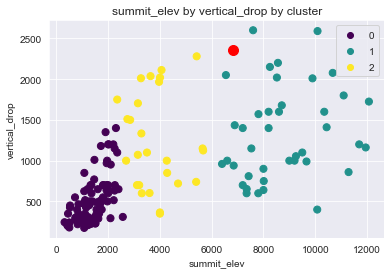

In [33]:
#figure 1
ax = plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['cluster'], s=50, cmap='viridis', label ='cluster')
plt.scatter(big_mountain['summit_elev'], big_mountain['vertical_drop'], c='red', s=100)
plt.legend(*ax.legend_elements())
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('C:\\Users\\chi\\Desktop\\spring_board\\Springboard\\Guided_capstone\\Step 2\\figures\\fig1.png',bbox_inches='tight')

### Figure 1 Description:
By plotting scatter plot by summit_elev and vertical_drop by clusters, 3 clusters are seen in the plot. Cluster 0:purple is plotted on summit_elev below 3,000 and vertical_drop below 1500. Cluster 2:yellow is plotted between summit_elev 3,000 and 6,000, between vertical_drop 2,500 and around 400. Cluster 1:green is plotted over summit_elev 6,000 and vertical_drop over around 400.In conclusion, Each cluster is seperated by sumit_elev level.<br>
The red dot is plot of Big Mountain, the plot is close to cluster 1: green. The big moutain is in high level summit_elev group and the vertical_drop is in high range.

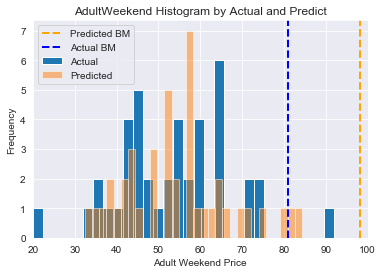

In [34]:
#figure 2
plt.hist(y_test, bins = 30, label='Actual')
plt.hist(y_pred, bins = 30, alpha = 0.5, label='Predicted')
plt.xlim(20,100)
plt.axvline(bm_pred, color='orange', linewidth=2, linestyle = '--', label = "Predicted BM")
plt.axvline(y_bm, color='blue', linewidth=2, linestyle = '--', label = "Actual BM")
plt.legend()
plt.xlabel('Adult Weekend Price')
plt.ylabel('Frequency')
plt.title('AdultWeekend Histogram by Actual and Predict')
plt.savefig('C:\\Users\\chi\\Desktop\\spring_board\\Springboard\\Guided_capstone\\Step 2\\figures\\fig2.png',bbox_inches='tight');

### Figure 2 Description:
The variable AdultWeekendPrice is plotted in histogram. Blue bar stands actual value of AdultWeekendPrice and orange bar stands predicted AdultWeekendPrice from linear regression model. Prdicted and actual value for big mountain is poltted to see compare with other resorts, the blue dotted line is describing actual value for big mountain, compare to other resorts adult weekend price it belongs to high priced. The orange dotted line describes predicted value of big mountain, after fit in to linear regression model the big mountain price went even higher almost up to 100.

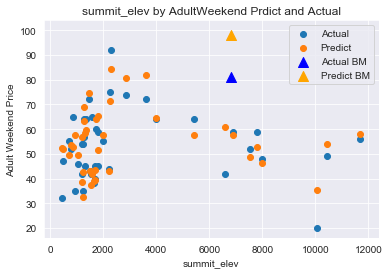

In [35]:
#figure 3
plt.scatter(X_test['summit_elev'], y_test, label ='Actual')
plt.scatter(X_test['summit_elev'], y_pred, label ='Predict')
plt.scatter(big_mountain['summit_elev'], y_bm, c='blue', marker = '^', s=100, label = 'Actual BM')
plt.scatter(big_mountain['summit_elev'], bm_pred, c='orange', marker = '^', s=100, label = 'Predict BM')
plt.legend()
plt.xlabel('summit_elev')
plt.ylabel('Adult Weekend Price')
plt.title('summit_elev by AdultWeekend Prdict and Actual')
plt.savefig('C:\\Users\\chi\\Desktop\\spring_board\\Springboard\\Guided_capstone\\Step 2\\figures\\fig3.png',bbox_inches='tight');

### Figure 3 Description:
Sccater plot by AdultWeekend and summit_elev is plotted by predicted and actual values. My assumtion was as the smmit_elev is larger the AdultWeekend would go up. However, from summit_elev point 2,000 the price of AdultWeekend decreased as the summit_elev increased.<br> 
The actual price very similar to predicted price but most likely it's lower than predicted price. The pridicted price of bigmountain certainly is higher than actual price of big mountain.

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [36]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'C:\\Users\\chi\\Desktop\\spring_board\\Springboard\\Guided_capstone\\Step 2\\models\\regression_model_adultweekend.joblib') 

['C:\\Users\\chi\\Desktop\\spring_board\\Springboard\\Guided_capstone\\Step 2\\models\\regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [37]:
linear_coef= pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
linear_coef= linear_coef.sort_values('Coefficient', ascending = False)
linear_coef.to_csv('Capston_1_lm_coef.csv')

In [38]:
metric = pd.DataFrame(data ={
'EVC':[explained_variance_score(y_test, y_pred)],
'MAE':[mean_absolute_error(y_test, y_pred)]
}, dtype= float).T
metric = metric.rename(columns={0: 'Coefficient'})

In [39]:
linear_coef_metric = pd.concat([linear_coef, metric], axis=0)
linear_coef_metric.to_csv('Capston_1_lm_coef.csv')

In [40]:
linear_coef_metric

,Coefficient
Tennessee,28.39457
North Carolina,24.13845
Virginia,22.20827
West Virginia,21.56437
Maine,19.42788
Maryland,18.79391
Vermont,18.75569
Massachusetts,18.17003
New Hampshire,16.38893
New Jersey,16.25006
